In [180]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

# Lab Final: Analysing Various Approximation Methods
Approximate the function
 $$ f_a(x) = x^a \cdot \chi _{(0,\infty)} (x) $$
 where $\chi$ is the characteristic function and $a$ is a parameter.

In [417]:
# The function we wish to approximate
def get_fa(a):
    return lambda x: abs(x)**a*(x > 0)

# Returns the element in vector A to which x is closest
def findNearest(x,A):
    idx = (np.abs(A-x)).argmin(1)
    return A[idx]

# Computes the absolute difference between functions f and g
# at N linearly spaced test points, and takes the largest difference
# as a approximation of the uniform norm ||f-g||_\infty
def maxDif(f,g,I):
    N = 10000
    test_points = np.linspace(I[0],I[1],N).reshape([N,1])
    return max(np.abs(f(test_points)-g(test_points)))

# Given an approximation method "AppxFnct", plots a 5x5 grid
# of plots overlaying the approximation and the original function
# for the 5 "n" parameters in N2, and the 5 "a" parameters in A2
def plotExamples(AppxFnct,N2,A2):
    # Points at which to plot functions
    X = np.linspace(I[0],I[1],1000).reshape([1000,1])
    fig = plt.figure(figsize=(15,15))
    ax = []
    for j in range(0,5):
        for i in range(0,5):
            n = int(N2[i])
            a = A2[j]
            nodes = np.linspace(I[0],I[1],n)
            # Original function with parameter a
            f = get_fa(a)
            # Approximation of f at nodes (in the case of
            # Chebycheff interpolation the length of "nodes"
            # encodes the degree of the polynomial)
            g = AppxFnct(f,nodes)
            ax.append(plt.subplot(5,5,i*5+j+1))
            if(i == 0):
                ax[-1].set_title("a = " + str(A2[j]))
            if(j  == 0):
                ax[-1].set_ylabel("n = " + str(N2[i]))
            ax[-1].plot(X,f(X),'b')
            ax[-1].plot(X,g(X),'r')
    plt.show()
    
# Computes the error of the approximation for the 
# "n" values in N and the "a" values in A
def getError(AppxFnct,N,A):
    E = np.zeros([len(N), len(A)])
    for j in range(0,len(A)):
        a = A[j]
        for i in range(0,len(N)):
            n = int(N[i])
            nodes = np.linspace(I[0],I[1],n)
            f = get_fa(a)
            g = AppxFnct(f,nodes)
            E[i,j] = maxDif(f,g,I)
    return E

# Plots the error as a function of N (with 10 different 
# "a" parameters)
def plotError(E,N,A):
    fig = plt.figure(figsize=(25,10))
    ax = []
    for j in range(0,len(A)):
        ax.append(plt.subplot(2,5,j+1))
        ax[-1].plot(N-1,E[:,j])
        ax[-1].set_title("a = " + str(A[j]))
        
        # Calculate least-squares fit between log(E) and log(N)
        # to get a function E = n^r
        M = np.vstack([np.log(N-1), np.ones(len(N))]).T
        r, y_int = np.linalg.lstsq(M, np.log(E[:,j]))[0]
        plt.plot(N-1,(N-1)**r*np.exp(y_int),'-r')
        
        ax[-1].legend(['Estimated Error','y = %.4f $n^{%.4f}$' %(y_int,r)],fontsize=16)
        ax[-1].set_xscale('log')
        ax[-1].set_yscale('log')
    plt.show()


I = [-1, 1]

## Exercise 1. Holder Continuity
First, note that $x^a$ is continuous $\forall a > 0$ and is equal to zero at $x=0$. Thus $f_a$ is continuous.

Second, note that for $a\in (0,1)$, we have
$$f_a^{'}(x) = \frac{a}{x^{1-a}} \cdot \chi _{(0,\infty)} (x) $$
Which blows up at $x=0$. Thus for any fixed $\delta = y - x$ we have that 
$$\sup \left | f(y)-f(x) \right | = f(\delta)-f(0)$$
Hence, our Holder condition is: $\alpha$ such that $\forall \delta >0$
$$\frac{\delta^a}{\delta^\alpha} \le M < \infty $$
which gives us that $\alpha \le a$. Hence, $f_a \in C^{0,a}([-1,1])$

Third, note that
$$ f_a^{(k)}(x) = Mx^{a-k} \cdot \chi _{(0,\infty)} (x) $$
In partiular, the kth derivative is discontinuous at 0 for any $k\ge a$. By our first point, all lower derivatives are continuous. Thus $f_a \in C^{\lfloor a \rfloor}([-1,1])$

Finally, $f_a^{(\lfloor a \rfloor)} = M\cdot f_{\{a\}}$.

Hence, $\forall a$, 
$$f_a \in C^{\lfloor a \rfloor,\{a\}}([-1,1]) $$ 
and "$k+\alpha$" is equal to $a$.

## Exercise 2. Piecewise Constant


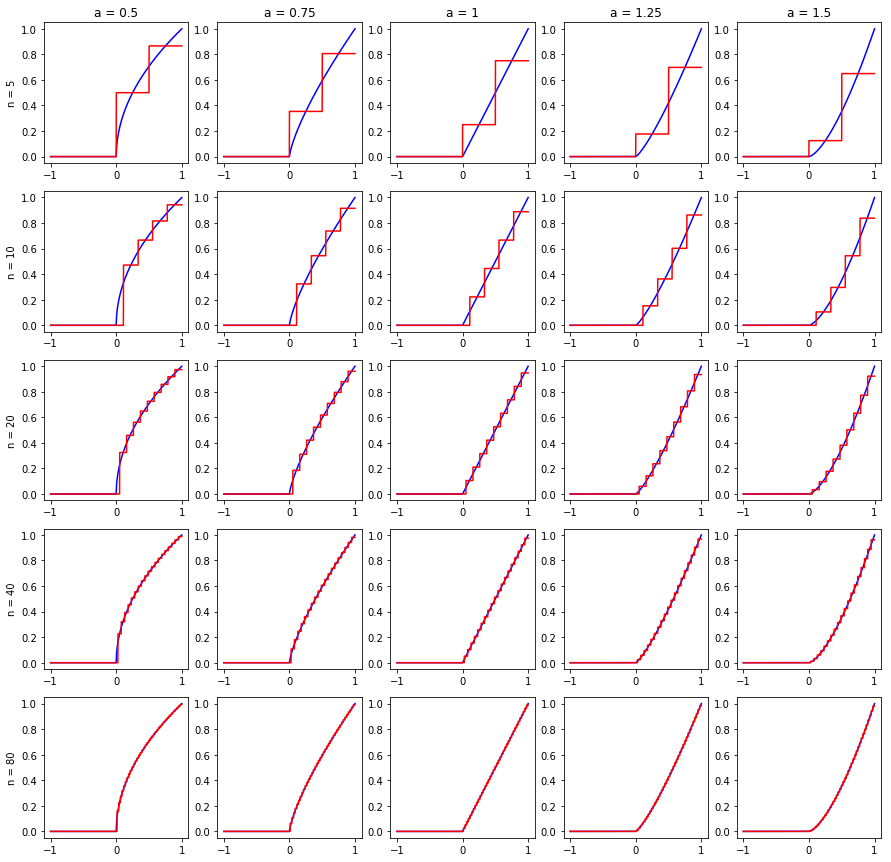

In [437]:
# Approximate f with midpoint rule on intervals defined by nodes
def stepAppx(f,nodes):
    nodes = 0.5*(nodes[1:]+nodes[:-1])
    # Returns function the estimates f(x) by f(c) where c is the nearest 
    # midpoint to x (some reshaping to allow broadcasting)
    return lambda x: f(findNearest(x,nodes)).reshape([len(x),1])

plotExamples(stepAppx,[5,10,20,40,80],[0.5,0.75,1,1.25,1.5])

In [468]:
N1 = np.linspace(10,500,50)
A1 = np.linspace(0.5,1.4,10)
E1 = getError(stepAppx,N1,A1)

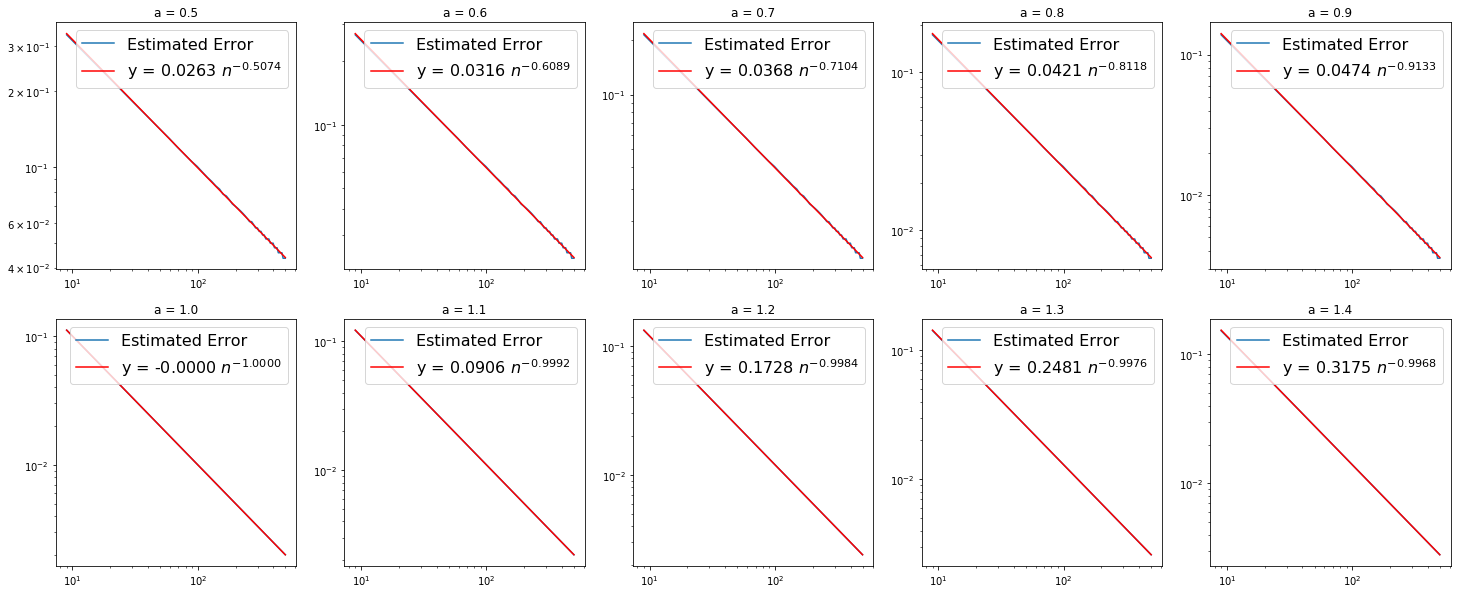

In [469]:
plotError(E1,N1,A1)

### Observation
It seems that the rate of convergence is approximately equal to $n^{-a}$ for $a<1$, but there is a ceiling at $r=1$
### Theory
This approximation method approximates $f_a$ by $\tilde{f}_a(x) = f_a(c)$, $\forall x\in(c-(2n)^{-1},c+(2n)^{-1})$. We can write the Taylor expansion:
$$f(x) = f(c) + f'(c)(x-c) + O((x-c)^{-2})$$
Thus, we have
$$f(x) - \tilde{f}(x) \le f'(c)n^{-1} + O(n^{-2}) = O(n^{-1})$$
Hence, our error cannot be better than $O(n^{-1})$, which explains our the cap on convergence rate we see. For $a<1$, $f_a \in C^{0,a}$, so by Jackson's inequality, the best approximation error $E_nf\lesssim n^{-a}$, which contextualizes the behaviour for smaller $a$.

## Exercise 3. Piecewise Linear

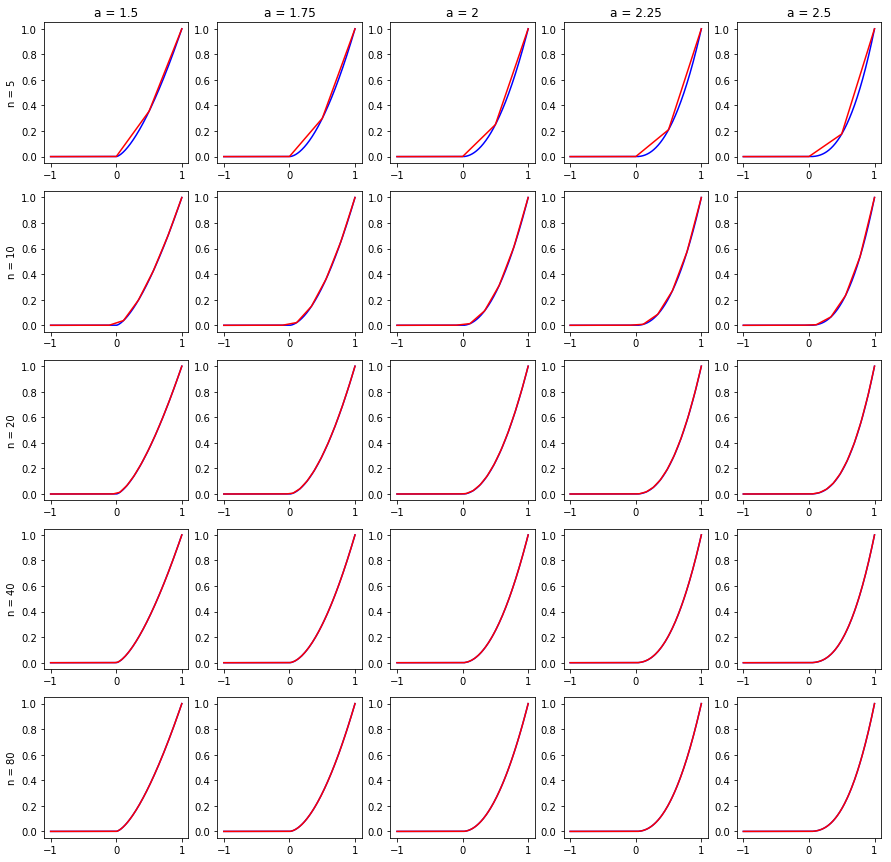

In [419]:
# Approximates f by linear interpolation in the intervals
# defined by the nodes
def linAppx(f,nodes):
    return lambda x: np.interp(x,nodes,f(nodes))

plotExamples(linAppx,[5,10,20,40,80],[1.5,1.75,2,2.25,2.5])

In [430]:
N2 = np.linspace(100,1000,51)
A2 = np.linspace(0.6,2.4,10)
E2 = getError(linAppx,N2,A2)

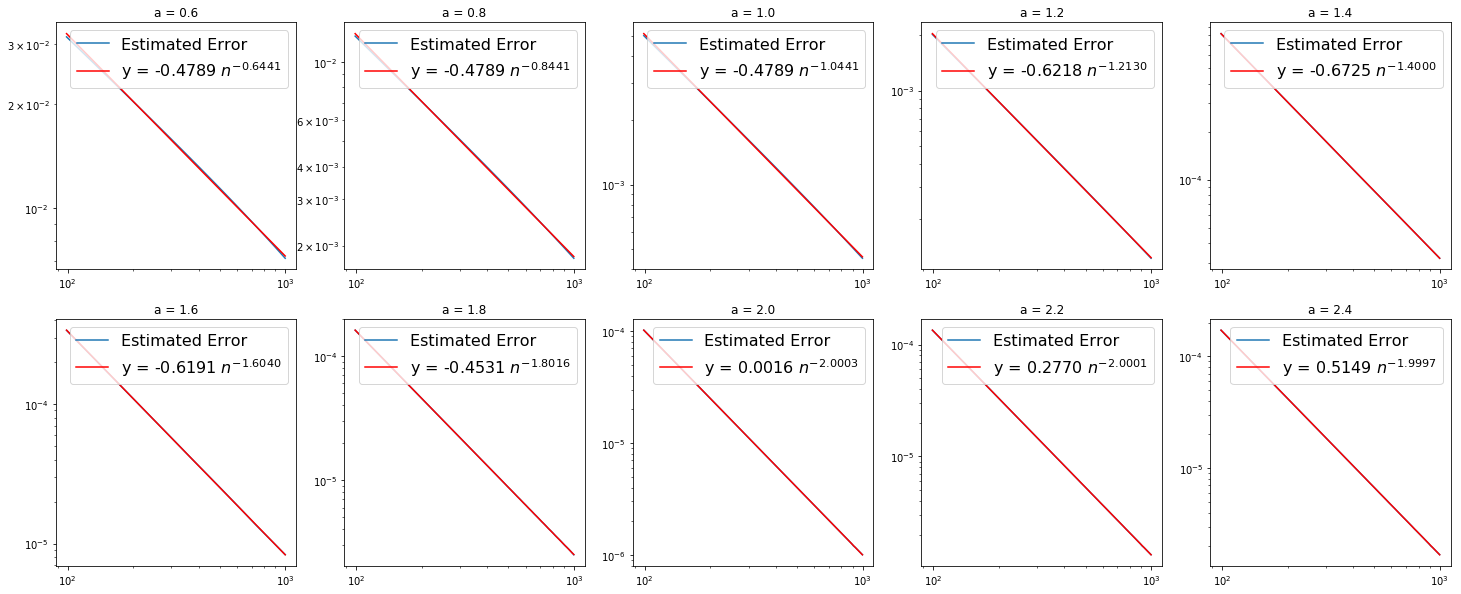

In [431]:
plotError(E2,N2,A2)

### Observation
It seems that the rate of convergence is approximately equal to $n^{-a}$ for $a<2$, but there is a ceiling at $r=2$. We still seem to have a cap on our convergence rate, but it is higher than for constant-piecewise approximation.
### Theory
This approximation method approximates $f_a$ by 
$$\tilde{f}_a(x) = \frac{f_a(c+1/n)-f_a(c)}{1/n}(x-c)+f(c)$$
, $\forall x\in(c,c+1/n)$. We can write the Taylor expansion:
$$f(x) = f(c) + f'(c)(x-c) + O(n^{-2})$$
Furthermore, we can use the estimate
$$\frac{f_a(c+1/n)-f_a(c)}{1/n} \approx f_a^{'}(c)$$
Thus, we have
$$f(x) - \tilde{f}(x) = O(n^{-2})$$
Hence, our error cannot be better than $O(n^{-2})$, which explains our the cap on convergence rate we see. For $a<1$, $f_a \in C^{0,a}$, so by Jackson's inequality, the best approximation error is approximately less than $n^{-a}$. Fo $a\in(1,2)$, $f_a \in C^{1,\{a\}}$, so we expect $E_nf\lesssim n^{-1-\{a\}} = n^{-a}$. This contextualizes the rate of convergence we see experimentally. 

## Exercise 4. Bernstein Polynomials

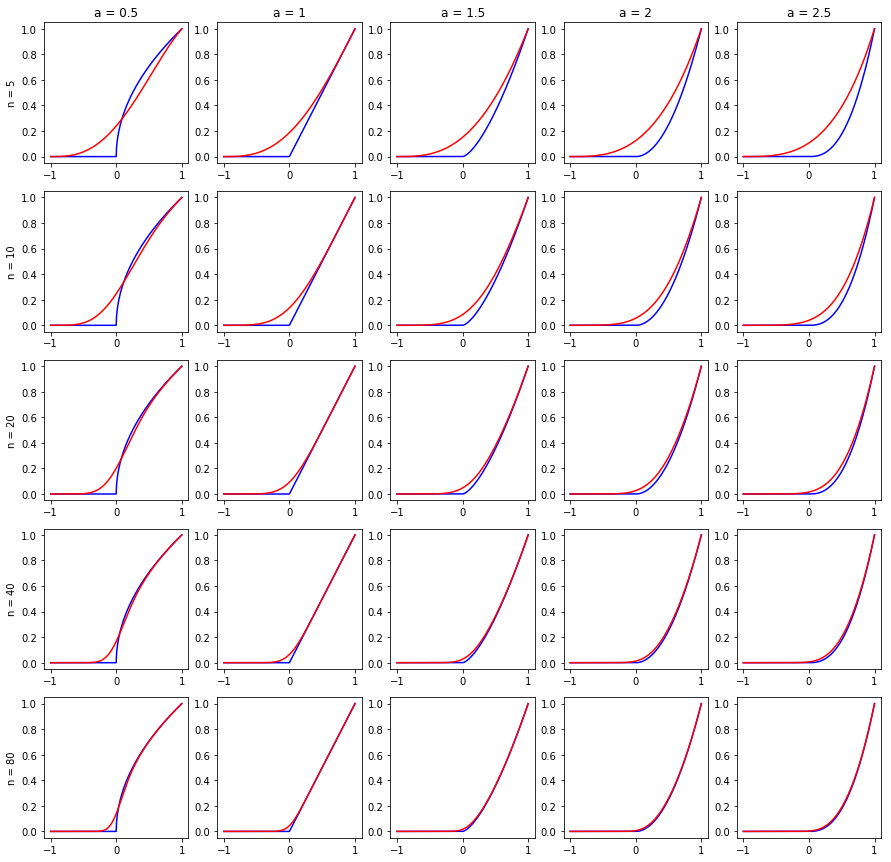

In [420]:
# Function to calculate Bernstein polynomial from sample
# data D, and evaluate polynomials at query points X
def BernsteinPoly(D,X):
    n = D.shape[0]-1 # D := [d_0 ... d_n]^T
    B = 0
    for j in range(n+1):
        B += binom(n,j)*np.multiply(np.power(X,j),np.power(1-X,n-j))*D[j]
    return B

def bernAppx(f,nodes):
    return lambda x: BernsteinPoly(f(nodes),(x+1)/2)

plotExamples(bernAppx,[5,10,20,40,80],[0.5,1,1.5,2,2.5])

In [460]:
N3 = np.linspace(25,89,33)
A3 = np.linspace(0.5,2.3,10)
E3 = getError(bernAppx,N3,A3)

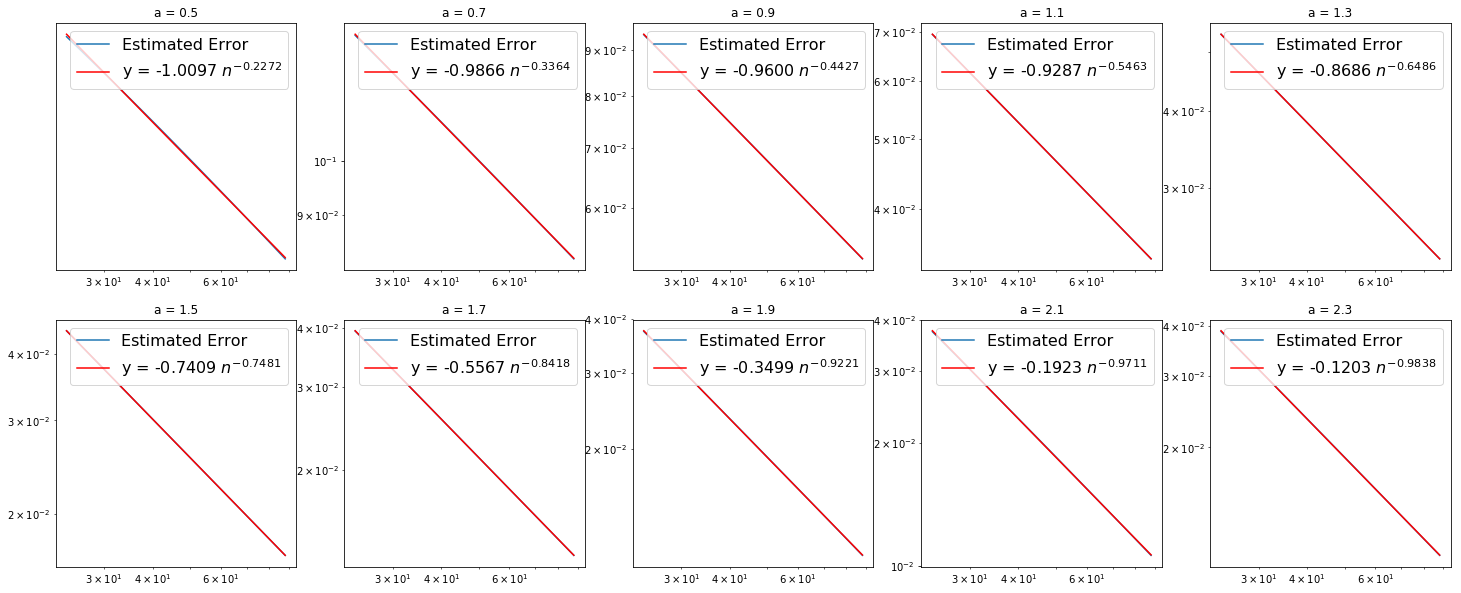

In [461]:
plotError(E3,N3,A3)

### Observation
Similar to piecewise-constant approximation, we appear to have a cap at $r=1$. However, diverging from previous methods, we seem to get a rate of convergence approximately equal to $n^\frac{a}{2}$ for $a<2$.
### Theory
It was remarked in class that for $f\in C^{0,\alpha}$, $\left| \left| f-B_nf \right| \right| \lesssim n^{-\alpha/2}$, which explains our observations for $a<2$. It is also known $^1$ that if $f\in C''$, then the convergence rate is not faster than $n^{-1}$ which explains the cap that we see.

$^1$ Farouki, R.T. (2012) *The Bernstein polynomial basis: a centennial retrospective*.

## Exercise 5. Chebycheff Interpolation

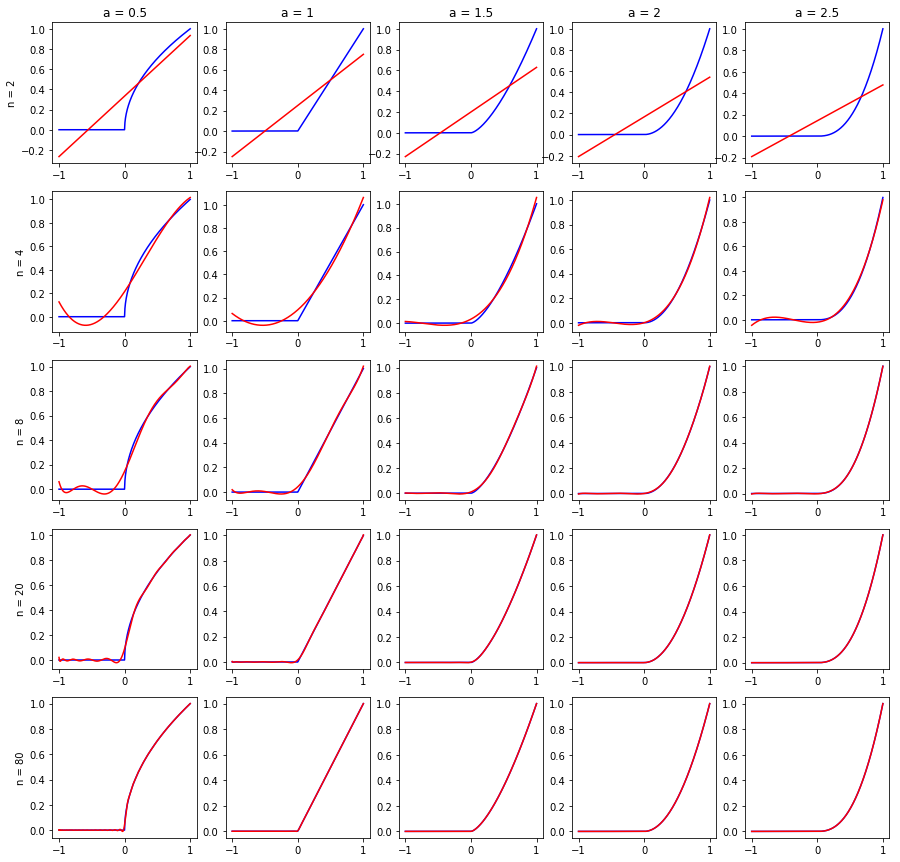

In [421]:
# Approximates f via Chebycheff interpolation with Chebycheff polynomials
# of degree n = length(nodes)-1
def chebyAppx(f,nodes):
    X = np.linspace(-1,1,1009)
    CC = np.polynomial.chebyshev.chebfit(X,f(X),len(nodes)-1)
    return np.polynomial.chebyshev.Chebyshev(CC)

plotExamples(chebyAppx,[2,4,8,20,80],[0.5,1,1.5,2,2.5])

In [466]:
N4 = np.linspace(25,90,66)
A4 = np.linspace(0.5,5.9,10)
E4 = getError(chebyAppx,N4,A4)

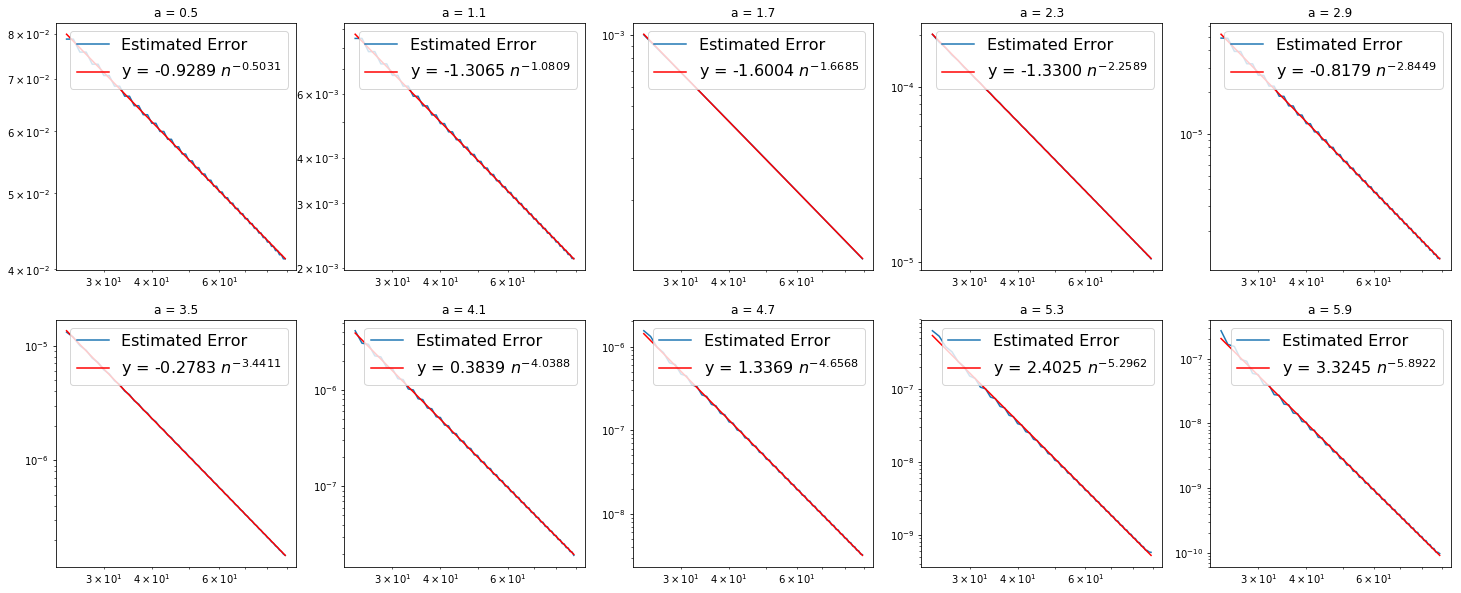

In [467]:
plotError(E4,N4,A4)

### Observation
It seems that the rate of convergence is approximately equal to $n^a$. Unlike all the previous approximation methods, this does not seem to have a convergence rate cap.

### Theory
Our Taylor-estimate for interpolation gives us
$$f(x)-L_n(x) = \frac{(x-x_0)...(x-x_n)}{n!}f^{(n+1)}(\xi)$$
where our Chebycheff nodes minimize the value of $(x-x_0)...(x-x_n)$. In particular, we don't have the contraint on the error imposed by our previous approximation methods. Given that our function is in the Holder space $C^{\lfloor a\rfloor,\{a\}}$, as stated in class, we expect
$$\left| \left| f - L_nf \right| \right| \le C \frac{\log n}{n^a} $$
which explains our observed convergence rate and why it is perhaps slightly slower that $n^{-a}$.